# MiniEM Performance Tests on Blake - Blob Problem 



## Description of problem


FIXME: fill in (Jonathan).  This is an example of citations: \cite{Dukowicz:2010, Schoof:2010}.  

### Governing equations 

FIXME: fill in - Jonathan


### Description of testing  

FIXME: fill in - Jonathan 

### Performance results  

Results generated by Jerry's scripts will go here.  

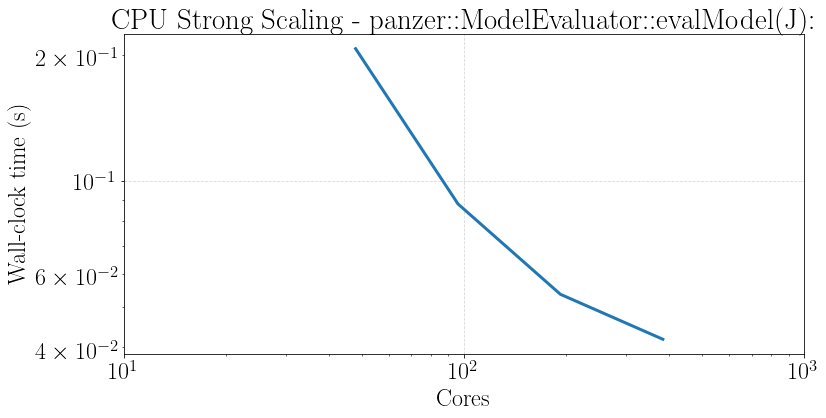

Cores:  (48, 96, 192, 384)
Wall-clock Time:  (0.206791, 0.088036, 0.053571, 0.0418375)


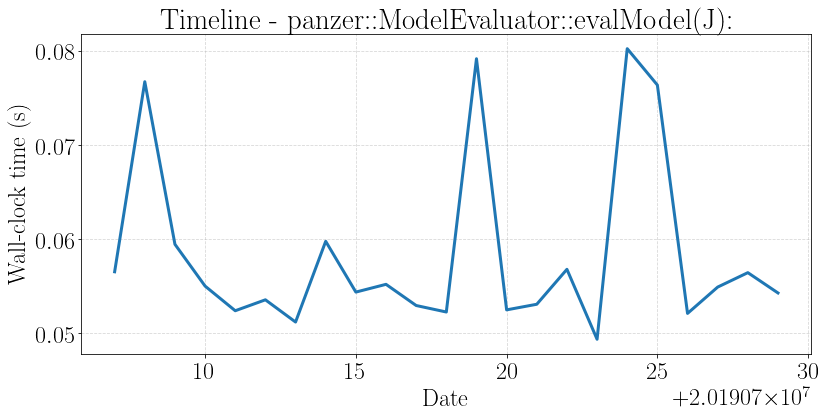

Dates:  (20190707, 20190708, 20190709, 20190710, 20190711, 20190712, 20190713, 20190714, 20190715, 20190716, 20190717, 20190718, 20190719, 20190720, 20190721, 20190722, 20190723, 20190724, 20190725, 20190726, 20190727, 20190728, 20190729)
Wall-clock Time:  (0.0565447, 0.0767238, 0.0594632, 0.0550267, 0.0524101, 0.053571, 0.0512109, 0.0597806, 0.0543906, 0.0552138, 0.0529656, 0.0522754, 0.0791621, 0.052503, 0.0530983, 0.0568074, 0.0493814, 0.080231, 0.0763688, 0.0521257, 0.0549228, 0.0564537, 0.0542964)


In [2]:
import glob
import os

# Set fontsize and plotting text to latex
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = [12, 6]

# CHANGE TO PATH TO JSON FILES
jsonPath = '../../ikalash.github.io/blake_nightly_data'

# Import scripts
import sys
sys.path.append('scripts')
sys.path.append(jsonPath)
from json2strong import json2strong
from json2timeline import json2timeline

# Extract file names
files = glob.glob(os.path.join(jsonPath,'ctest-*'))

# Latest strong scaling results
file = files[-1]
case = 'R0'
timer = 'panzer::ModelEvaluator::evalModel(J):'
nps, wtimes = json2strong(file, case, timer)

# Plot
plt.figure()
plt.loglog(nps, wtimes, linewidth=3.0)
plt.xlabel('Cores')
plt.ylabel('Wall-clock time (s)')
plt.xlim((10,1000))
#plt.ylim((6e-3, 1e-1))
plt.tight_layout()
#plt.legend(pltLegend,loc='upper left',bbox_to_anchor=(1,1),prop={'size': 16})
#plt.subplots_adjust(right=0.60)
plt.title('CPU Strong Scaling - ' + timer)
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
plt.show()

# Print
print("Cores: ", nps)
print("Wall-clock Time: ", wtimes)

# Timeline results
case = 'R0'
np = 192
timer = 'panzer::ModelEvaluator::evalModel(J):'
dates, wtimes = json2timeline(files, case, np, timer)

# Plot
plt.figure()
#x = range(len(dates))
#plt.xticks(x, dates)
plt.plot(dates, wtimes, linewidth=3.0)
plt.xlabel('Date')
plt.ylabel('Wall-clock time (s)')
#plt.ylim((6e-3, 1e-1))
plt.tight_layout()
#plt.legend(pltLegend,loc='upper left',bbox_to_anchor=(1,1),prop={'size': 16})
#plt.subplots_adjust(right=0.60)
plt.title('Timeline - ' + timer)
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
plt.show()

# Print
print("Dates: ", dates)
print("Wall-clock Time: ", wtimes)


# References

[<a id="cit-Dukowicz:2010" href="#call-Dukowicz:2010">1</a>] Dukowicz J., Price S. and Lipscomb W., ``_Consistent approximations and boundary conditions for ice-sheet dynamics from a principle of least action_'', Journal of Glaciology, vol. 56, number , pp. 480-496,  2010.

[<a id="cit-Schoof:2010" href="#call-Schoof:2010">2</a>] Schoof C. and Hindmarsh R., ``_Thin-Film Flows withWall Slip: An Asymptotic Analysis of Higher Order Glacier Flow Models_'', Q.J. Mech. Appl. Math, vol. 63, number , pp. 73-114,  2010.

